## 다중공선성(Multicollinearity)
- 발생원인 : X(입력변수)들간에 중복성으로 상관성이 강하게 존재하는 경우
- 학습결과 : 학습 데이터가 변할 때마다 모델 학습 결과가 달라지는 현상 발생
---
현실 데이터에서 입력변수들이 완벽하게 독립인 경우는 없으므로, 모델을 수립하는 과정에서 다중공선성 문제를 반드시 고려해야 함!  
대처방안 : 중요 입력변수 선택 (VIF, mRMR 알고리즘 등)

### 1. 데이터 로드 및 전처리 

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("./data/Fault_data.csv",encoding="EUC-KR") 
data.drop(["자재구분","END_DATE_TIME"],axis=1,inplace=True) # 분석에 필요없는 column 제거
data.dropna(axis=1,inplace=True) # NaN값이 존재하는 열 제거

In [3]:
print("==== 수치 변화가 아예 없는 변수 제거 ====")
for i in data.columns: 
    if len(data[i].unique())==1:  # if 특정 column의 고유값이 한개이면(=수치변화가 없으면)
        data = data.drop([i],axis=1) # 해당 변수 제거
        print(i)

==== 수치 변화가 아예 없는 변수 제거 ====
CROT.STDDEV0
CROT.RANGE0
CROT.STDDEV1
CROT.RANGE1
CROT.STDDEV13
CROT.RANGE13
CROT.STDDEV5
CROT.RANGE5
CROT.STDDEV11
CROT.RANGE11
CROT.STDDEV10
CROT.RANGE10
CROT.STDDEV7
CROT.RANGE7
CROT.STDDEV14
CROT.RANGE14
CROT.STDDEV12
CROT.RANGE12
CROT.STDDEV9
CROT.RANGE9


In [4]:
data.shape

(139, 117)

In [5]:
#X,Y 분할
Y=data["Y"].copy()
X=data.drop("Y",axis=1)
X.head(3)

,CHAMBER,TAE.STDDEV0,TAE.MEAN0,TAE.RANGE0,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.MEAN0,TAE.STDDEV1,TAE.MEAN1,...,PC.STDDEV12,PC.MEAN12,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.MEAN9,PC.STDDEV9,PC.MEAN9,PC.RANGE9
0,4,0.044554,38.083127,0.254154,0.124753,0.044329,0.439883,35,0.121240,38.055619,...,3.821034,57.645580,17.350926,0.032832,35.011650,0.127077,35,0.405343,45.124841,3.079182
1,2,0.034801,38.052395,0.063538,0.177575,0.342131,0.439883,27,0.115462,38.016088,...,0.303504,56.613882,1.466280,0.020858,35.550245,0.063540,27,1.923012,45.350277,15.004887
2,3,0.030089,38.046407,0.127080,0.137559,0.063983,0.488759,15,0.119149,38.029244,...,2.845739,57.296468,13.098728,0.021635,36.013373,0.063538,15,0.161640,45.071393,0.977516


In [6]:
# 평가 지표 출력 함수
def print_all_reg(Y_test,pred):
    print("model의 MSE 값은 {:.3f}".format(mean_squared_error(Y_test,pred)))
    print("model의 MAE 값은 {:.3f}".format(mean_absolute_error(Y_test, pred)))
    print("model의 r2 값은 {:.3f}".format(r2_score(Y_test, pred)))

### 2. 상관계수 높은 변수 제거 전
- 랜덤시드에 따라 회귀계수의 변동성이 높은것을 확인할 수 있음
- 각 입력변수들은 센서값의 요약 통계치(평균, 표준편차, 범위)여서 변수간 상관관계가 높아 다중공선성이 발생하는 상황이기 때문.

In [7]:
# Without dimension reduction
coef_list = []
for seed in [20,13,12]: # seed 값은 사용자지정 임의의 상수, 동일 seed값이면 동일결과 반환
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed) # test_size : float or int, int값일시 test data로 분류할 만큼의 sample수 
    LM_model=LinearRegression()
    LM_model.fit(X_train,Y_train) # X_train, Y_train 데이터로 선형회귀모델 학습
    pred=LM_model.predict(X_test) # 학습한 모델에 X_test데이터를 입력하여 예측 Y값 생성
    print_all_reg(Y_test,pred) 
    coef_list.append(LM_model.coef_) #학습한 회귀모델의 계수값 리스트로 저장

model의 MSE 값은 525440.121
model의 MAE 값은 497.810
model의 r2 값은 -199.264
model의 MSE 값은 68122.457
model의 MAE 값은 199.930
model의 r2 값은 -21.666
model의 MSE 값은 198540.883
model의 MAE 값은 273.596
model의 r2 값은 -56.366


참고 : [pyplot.stem](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html)

C:\Users\HG\AppData\Local\Temp\ipykernel_6612\2163794354.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  m, s, _ = plt.stem(


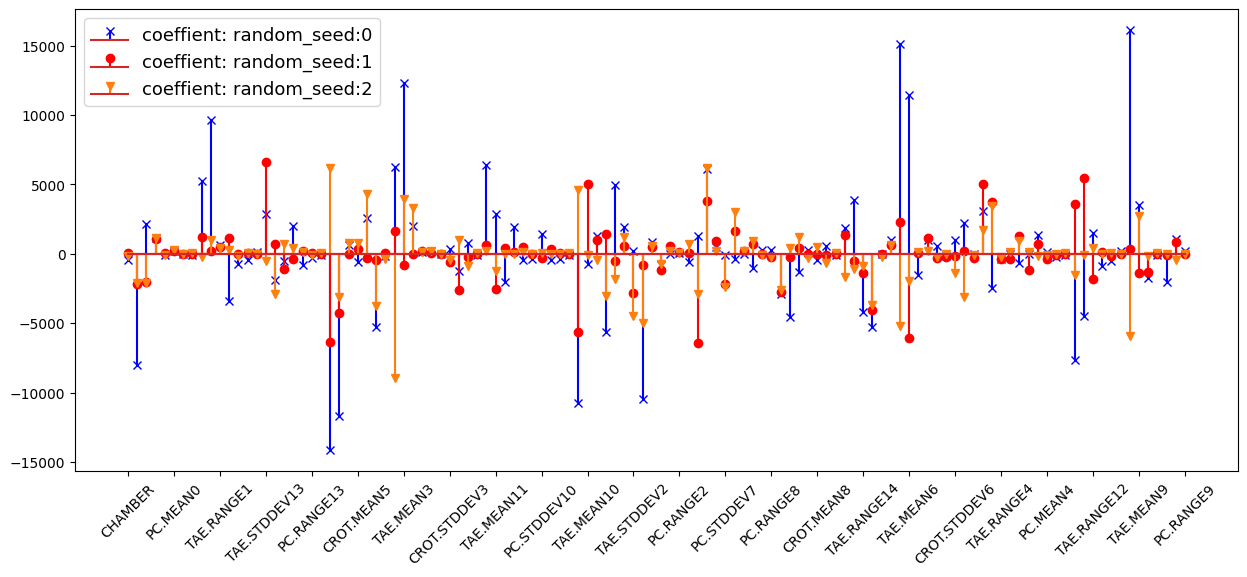

In [8]:
# 각 seed별 회귀계수값 stem plot을 활용한 시각화

marker = ['x','o','v']
colorlist = ['b','r','g']

plt.rcParams["figure.figsize"] = (15,6)

for index in range(len(marker)):
    m, s, _ = plt.stem(
        np.where(coef_list[index])[0], # 회귀계수가 0이아닌 데이터의 index 반환
        coef_list[index][coef_list[index] != 0], # 회귀계수가 0이아닌 데이터 값 반환
        colorlist[index],
        markerfmt=marker[index],
        label="coeffient: random_seed:"+str(index),
        use_line_collection=True,

    )

labels = X_train.columns
plt.xticks(ticks=list(range(len(labels))), labels=labels, rotation=45)
plt.locator_params(axis='x', nbins=len(labels)/5)
plt.setp([m, s], color="#ff7f0e")
plt.legend(loc = 'upper left',fontsize= 13)
plt.show() 

### 3. 상관계수 높은 변수 제거 후 
- 랜덤시드에 따라 회귀계수의 변동성이 감소한것을 확인할 수 있음

In [9]:
X.corr()

for col in X.columns:
    X_corr = X.corr() 
    tem = X_corr[col].fillna(0) 
    tem_max = tem.sort_values().iloc[-2]  # 상관계수 오름차순 정렬하여 최대값 추출
    tem_min = tem.sort_values().iloc[0] # 상관계수 오름차순 정렬하여 최소값 추출
    if tem_max > 0.9 or tem_min < -0.9:
        del X[col]  # 상관계수의 절대값이 0.9 초과시 다중공선성 발생한 변수로 간주, 해당 변수 제거

In [10]:
# With dimension reduction
coef_list = []
for seed in [20,13,12]:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
    X_train.columns

    LM_model=LinearRegression()
    LM_model.fit(X_train,Y_train) # X_train, Y_train 데이터로 선형회귀모델 학습
    pred=LM_model.predict(X_test) # 학습한 모델에 X_test데이터를 입력하여 예측 Y값 생성
    print_all_reg(Y_test,pred)
    coef_list.append(LM_model.coef_) #학습한 회귀모델의 계수값 리스트로 저장

model의 MSE 값은 8416.861
model의 MAE 값은 57.829
model의 r2 값은 -2.208
model의 MSE 값은 3713.546
model의 MAE 값은 47.655
model의 r2 값은 -0.236
model의 MSE 값은 3826.318
model의 MAE 값은 51.377
model의 r2 값은 -0.106


C:\Users\HG\AppData\Local\Temp\ipykernel_6612\243889162.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  m, s, _ = plt.stem(


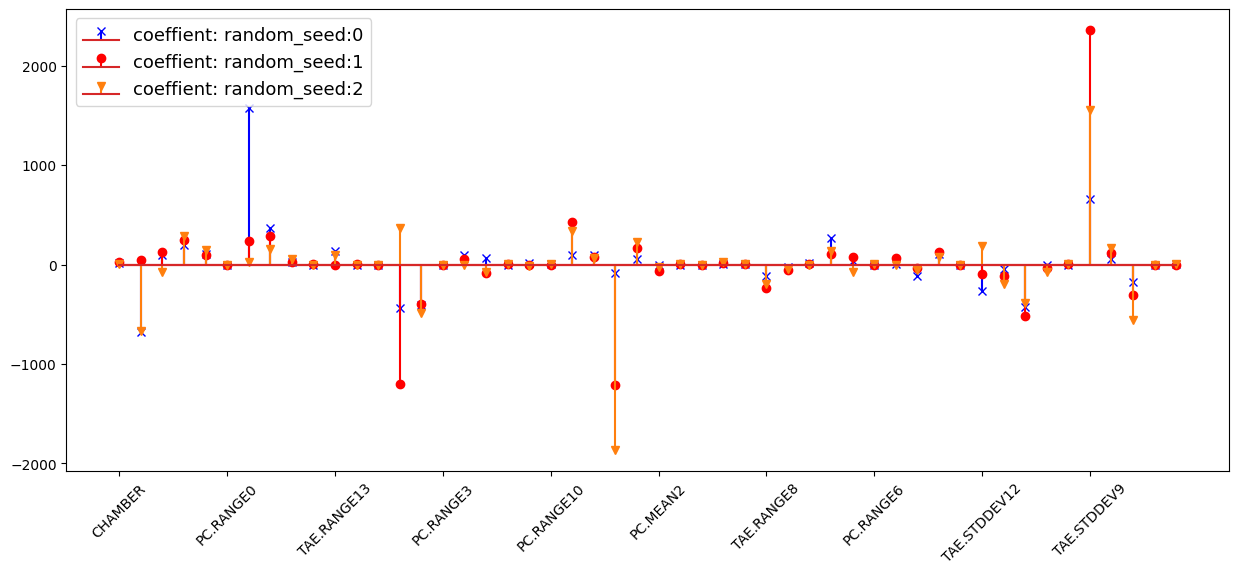

In [11]:
# 각 seed별 회귀계수값 stem plot을 활용한 시각화

marker = ['x','o','v']
colorlist = ['b','r','g']

plt.rcParams["figure.figsize"] = (15,6)

for index in range(len(marker)):
    m, s, _ = plt.stem(
        np.where(coef_list[index])[0], # 회귀계수가 0이아닌 데이터의 index 반환
        coef_list[index][coef_list[index] != 0], # 회귀계수가 0이아닌 데이터 값 반환
        colorlist[index],
        markerfmt=marker[index],
        label="coeffient: random_seed:"+str(index),
        use_line_collection=True,
    )

labels = X_train.columns
plt.xticks(ticks=list(range(len(labels))), labels=labels, rotation=45)
plt.locator_params(axis='x', nbins=len(labels)/5)
plt.setp([m, s], color="#ff7f0e")
plt.legend(loc = 'upper left',fontsize= 13)
plt.show() 